# Projet de Machine Learning

## Introduction

The objective of this project is to predict the variable Value-co2-emissions from the "Global Data on Sustainable Energy" dataset sourced from the KAGGLE competition website. We will achieve this by evaluating the performance of different machine learning regression methods. 

We will firstly get familiarized with the dataset and prepare it for the modelisation stage, then explore different types of regression methods. After, we will compare the different methods used, and draw conclusions. As a final stage, we will amputate the dataset with replacements for missing values and compare the performance of regression methods used on this new dataset.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd

Importing the dataset: 

In [4]:
path    = ''
data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

## Question 1

In [5]:
# Here we show the first five lines of the data
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


We can already see from the first glance at the dataset that the data contains "nan" values, for some variables more than others. We also see that it is necessary to convert 'Entity' and 'Year' to factorial data, this is the next thing we do. 

In [6]:
# Changing the type of qualitative variables into factors
data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True) # Changing the name of 'Density\\n(P/Km2)' to 'Density.n.P.Km2.'
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))

## Question 2

Further exploration of the amount of missing data

In [7]:
data_missing_value = data.isna().sum().sort_values(ascending=False)

print('Number of missing values = ', data_missing_value.sum())

Number of missing values =  6978


Cheching for duplicates in the data:

In [8]:
print("There are no duplicates in data? : ",data.duplicated().sum()==0)

There are no duplicates in data? :  True


In [9]:
# Checking which columns have missing values
isna_list = []
for col_name in data.columns:
    isna_list.append([col_name, data[col_name].isna().sum()])
isna_array = np.array(isna_list)

sorted_i = np.argsort(isna_array[:, 1].astype(int))[::-1]
sorted_i_array = isna_array[sorted_i]

#Printing the sorted list of missing values in the dataset
print(sorted_i_array) 

[['Renewables (% equivalent primary energy)' '2137']
 ['Financial flows to developing countries (US $)' '2089']
 ['Renewable-electricity-generating-capacity-per-capita' '931']
 ['Value_co2_emissions_kt_by_country' '428']
 ['gdp_growth' '317']
 ['gdp_per_capita' '282']
 ['Energy intensity level of primary energy (MJ/$2017 PPP GDP)' '207']
 ['Renewable energy share in the total final energy consumption (%)'
  '194']
 ['Access to clean fuels for cooking' '169']
 ['Electricity from nuclear (TWh)' '126']
 ['Low-carbon electricity (% electricity)' '42']
 ['Electricity from renewables (TWh)' '21']
 ['Electricity from fossil fuels (TWh)' '21']
 ['Access to electricity (% of population)' '10']
 ['Longitude' '1']
 ['Latitude' '1']
 ['Density.n.P.Km2.' '1']
 ['Land Area(Km2)' '1']
 ['Primary energy consumption per capita (kWh/person)' '0']
 ['Year' '0']
 ['Entity' '0']]


**Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset:**

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

* Financial flows to developing countries (US Dollars)

* Renewables (% equivalent primary energy).

We were also asked to remove 'Electricity from fossil fuels (TWh)' since it is strongly corelated to the variable to explain. 


In [10]:
columns_to_remove = ["Financial flows to developing countries (US $)",
                     "Renewable-electricity-generating-capacity-per-capita",
                     "Renewables (% equivalent primary energy)",
                     'Electricity from fossil fuels (TWh)']

# reloading the dataset to avoide dobbel-running on the same dataset
data = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))

data = data.drop(columns=columns_to_remove)

# Print the new dataset
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


## Question 3

In [11]:
original_dimensions = data.shape

data_complete = data.dropna()

# Printing old and new size of dataset
print("Original Dimensions:", original_dimensions)
print("New Dimensions:", data_complete.shape)

data = data_complete.copy()

data = data.reset_index()

Original Dimensions: (3649, 17)
New Dimensions: (2868, 17)


By removing lines from the dataset with missing data, we lose 781 observations. Although we are still left with a relatively large dataset, this is a large amount of data. Later in the project, we will investigate whether imputation of data can allow us to keep the original amount of data. 

## Question 4

We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, what is noticable is that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will do a barplot of all the countries that is missing at least a year.

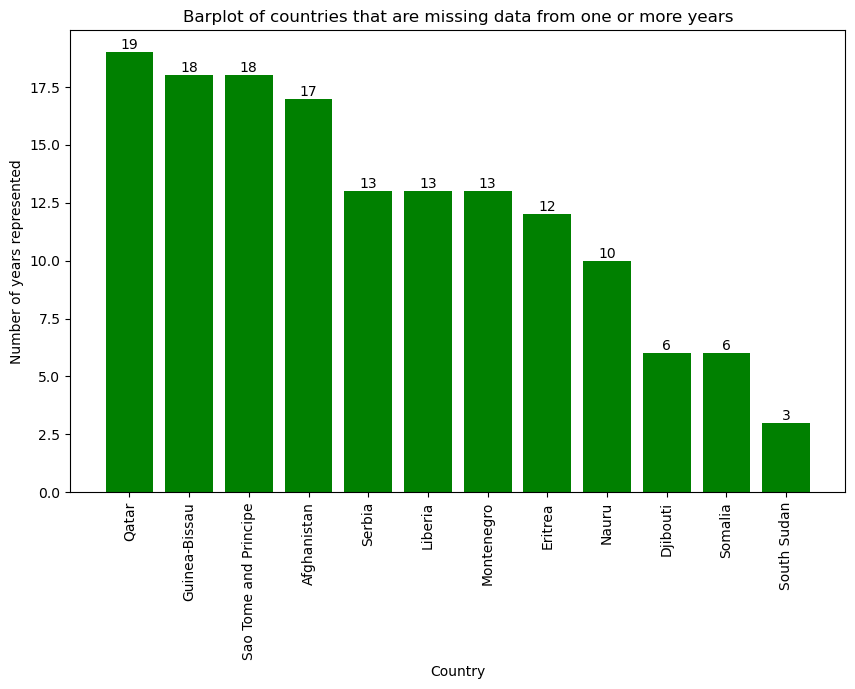

In [12]:
# Selecting data for countries missing at least one year 
entity_counts = data['Entity'].value_counts()
appearance_threshold = 20
filtered_entities = entity_counts[~entity_counts.isin([0, appearance_threshold])].index.tolist()
filtered_data = data[data['Entity'].isin(filtered_entities)]
entity_table = filtered_data['Entity'].value_counts()
entity_table = entity_table[filtered_entities]


plt.figure(figsize=(10, 6))  
plt.bar(filtered_entities, entity_table, color="green")
plt.title("Barplot of countries that are missing data from one or more years")
plt.xticks(rotation=90) 
plt.xlabel("Country")
plt.ylabel("Number of years represented")
# adding labels
for i, count in enumerate(entity_table):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables.

In [13]:
#Transformation of variables
#WARNING: Only run ONCE!!
data['Access to electricity (% of population)'] = np.sqrt(data['Access to electricity (% of population)'])
data["Access to clean fuels for cooking"] = np.sqrt(data["Access to clean fuels for cooking"])

data["Electricity from nuclear (TWh)"] = np.sqrt(data["Electricity from nuclear (TWh)"])
data["Electricity from renewables (TWh)"] = np.sqrt(data["Electricity from renewables (TWh)"])
data["Value_co2_emissions_kt_by_country"] = np.log(data["Value_co2_emissions_kt_by_country"])

data["Primary energy consumption per capita (kWh/person)"] = np.log(data["Primary energy consumption per capita (kWh/person)"])
data["gdp_per_capita"] = np.log(data["gdp_per_capita"])
data["Land Area(Km2)"] = np.log(data["Land Area(Km2)"])

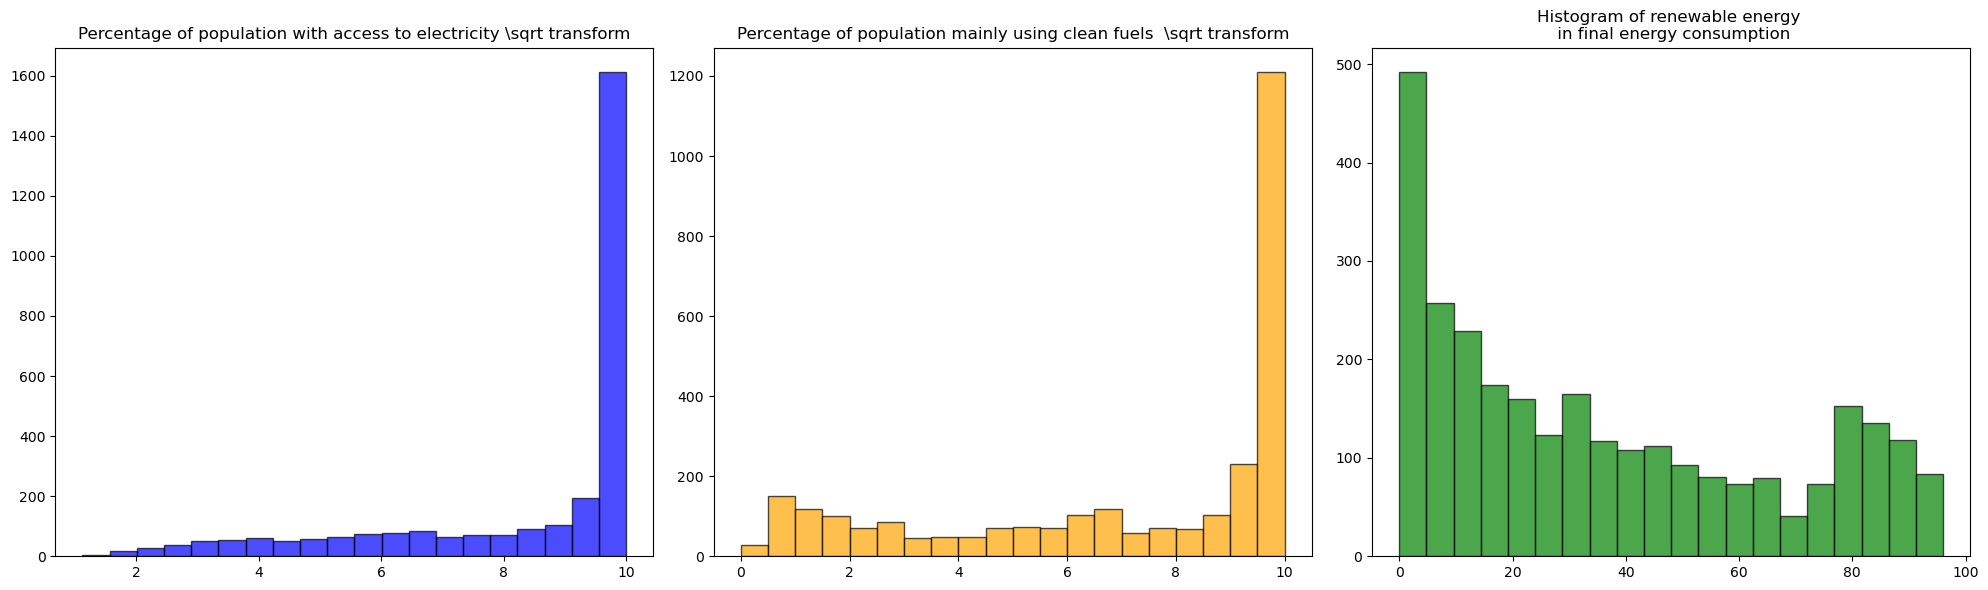

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Access to electricity (% of population)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Percentage of population with access to electricity \sqrt transform')

axs[1].hist(data["Access to clean fuels for cooking"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Percentage of population mainly using clean fuels  \sqrt transform')

axs[2].hist(data["Renewable energy share in the total final energy consumption (%)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of renewable energy \n in final energy consumption')

plt.tight_layout()
plt.show()

This shows us that most places, a 100% of the population has access to electricity. This is almost the case for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most have 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%. 

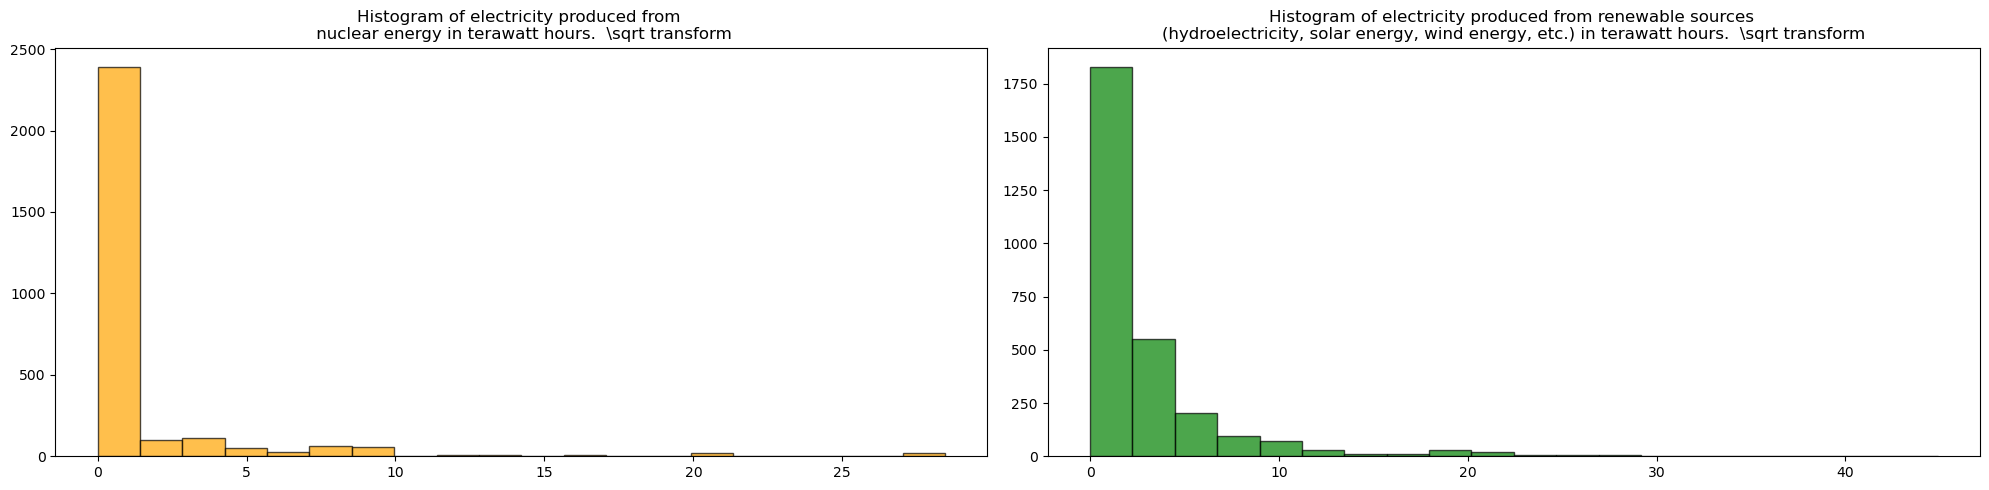

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].hist(data["Electricity from nuclear (TWh)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of electricity produced from \n nuclear energy in terawatt hours.  \sqrt transform')

axs[1].hist(data["Electricity from renewables (TWh)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of electricity produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) in terawatt hours.  \sqrt transform')

plt.tight_layout()

plt.show()

With the next three variables, we have transformed the variables using a square root-tranformation. There is high frequancy of the lowest level of energy production, which is logical as not all countries produce a lot of electricity. 

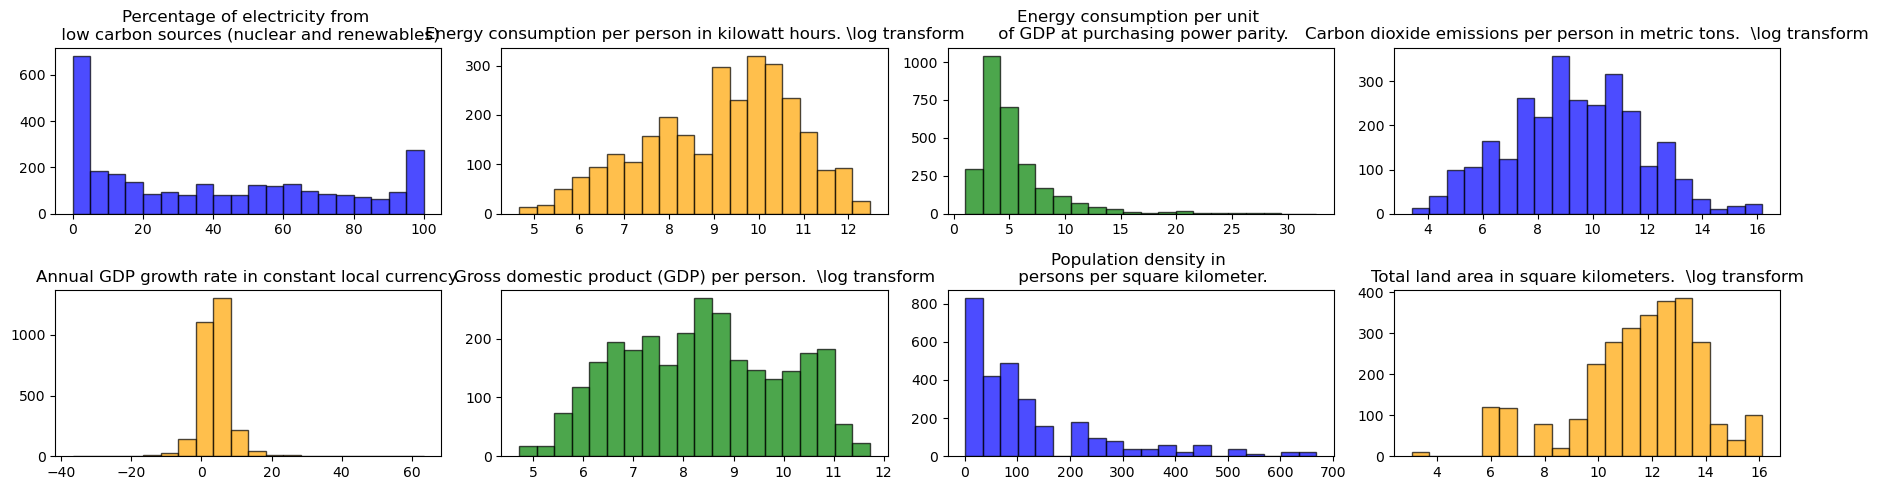

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(18, 5))

# Plotting of the histograms for each column in separate subplots
axs[0][0].hist(data['Low-carbon electricity (% electricity)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][0].set_title('Percentage of electricity from \n low carbon sources (nuclear and renewables)')

axs[0][1].hist(data["Primary energy consumption per capita (kWh/person)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][1].set_title('Energy consumption per person in kilowatt hours. \log transform')

axs[0][2].hist(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[0][2].set_title('Energy consumption per unit \n of GDP at purchasing power parity.')

axs[0][3].hist(data["Value_co2_emissions_kt_by_country"], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][3].set_title('Carbon dioxide emissions per person in metric tons.  \log transform')

axs[1][0].hist(data["gdp_growth"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][0].set_title('Annual GDP growth rate in constant local currency.')

axs[1][1].hist(data["gdp_per_capita"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1][1].set_title('Gross domestic product (GDP) per person.  \log transform')

axs[1][2].hist(data['Density.n.P.Km2.'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[1][2].set_title('Population density in \n persons per square kilometer.')

axs[1][3].hist(data["Land Area(Km2)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][3].set_title('Total land area in square kilometers.  \log transform')

plt.tight_layout()
plt.show()

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electivity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e⁹ - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is e⁸ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0-5%
- GDP per person is centered around e⁸ = 2980
- Most places have a very low population density

## Question 5

We explore the data further by finding the countries with the highest and lowest CO2 emissions per year. We do not take into account the countries' size or population density, which can be investigated in further studies. 

In [17]:
co2_pays_annees = {}
country = ""
tot = 0
for i in range(data.shape[0]):
    if data["Entity"][i] == country:
        tot += data["Value_co2_emissions_kt_by_country"][i]
    else:
        co2_pays_annees[country] = tot
        country = data["Entity"][i]
        tot = 0
        
del co2_pays_annees[""]

co2_pays_annees0 = co2_pays_annees.copy() 
biggest = []
temp = co2_pays_annees
for i in range(5):
    big = max(temp, key=co2_pays_annees.get)
    biggest.append(big)
    del temp[big]

lowest = []
temp2 = co2_pays_annees
for i in range(5):
    low = min(temp, key=co2_pays_annees.get)
    lowest.append(low)
    del temp2[low]
    
print("The countries with the highest amount of CO2 emissions are (highest amount first): ",biggest[:5])

print("The countries with the lowest amount of CO2 emissions are (lowest amount first): ",lowest[:5])
    
df_co2_pays_annees = pd.DataFrame({'country':co2_pays_annees0.keys(), 'co2 emission':co2_pays_annees0.values()})


The countries with the highest amount of CO2 emissions are (highest amount first):  ['China', 'United States', 'India', 'Japan', 'Germany']
The countries with the lowest amount of CO2 emissions are (lowest amount first):  ['South Sudan', 'Djibouti', 'Somalia', 'Nauru', 'Eritrea']


The next chart shows the heterogeneity in the amount of CO2 emissions in the countries studied in this project.

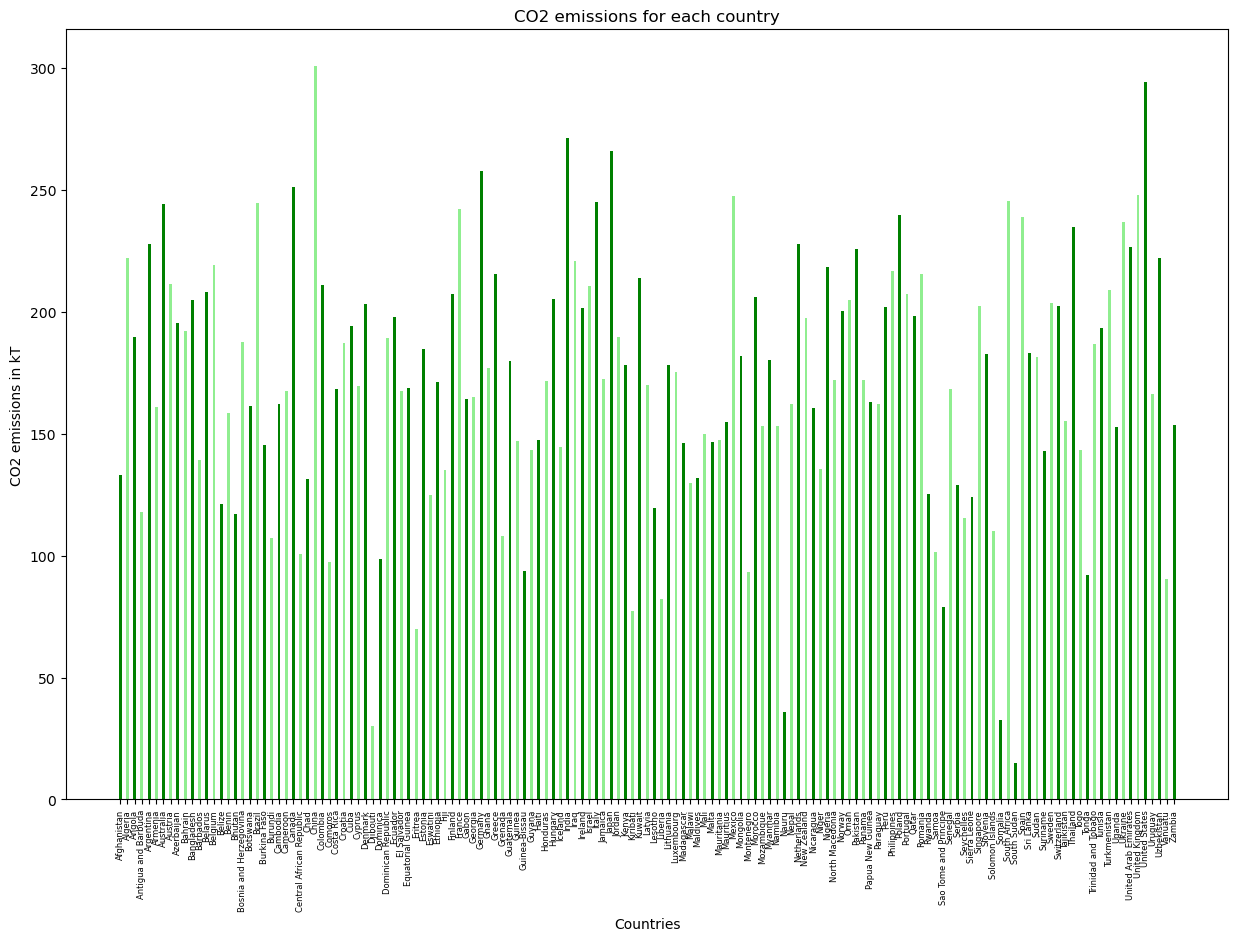

In [18]:
plt.figure(figsize=(15, 10))  
plt.bar(df_co2_pays_annees['country'],df_co2_pays_annees['co2 emission'],width=0.4,color = ['green', 'lightgreen']) #, figsize=(500, 100), color = ['red', 'blue']) #y = "co2 emission", x = "country",
plt.title("CO2 emissions for each country")
plt.xticks(rotation=90,fontsize=6) 
plt.xlabel("Countries")
plt.ylabel("CO2 emissions in kT")
plt.show()

## Question 6

## Analyse descriptive multidimensionnelle

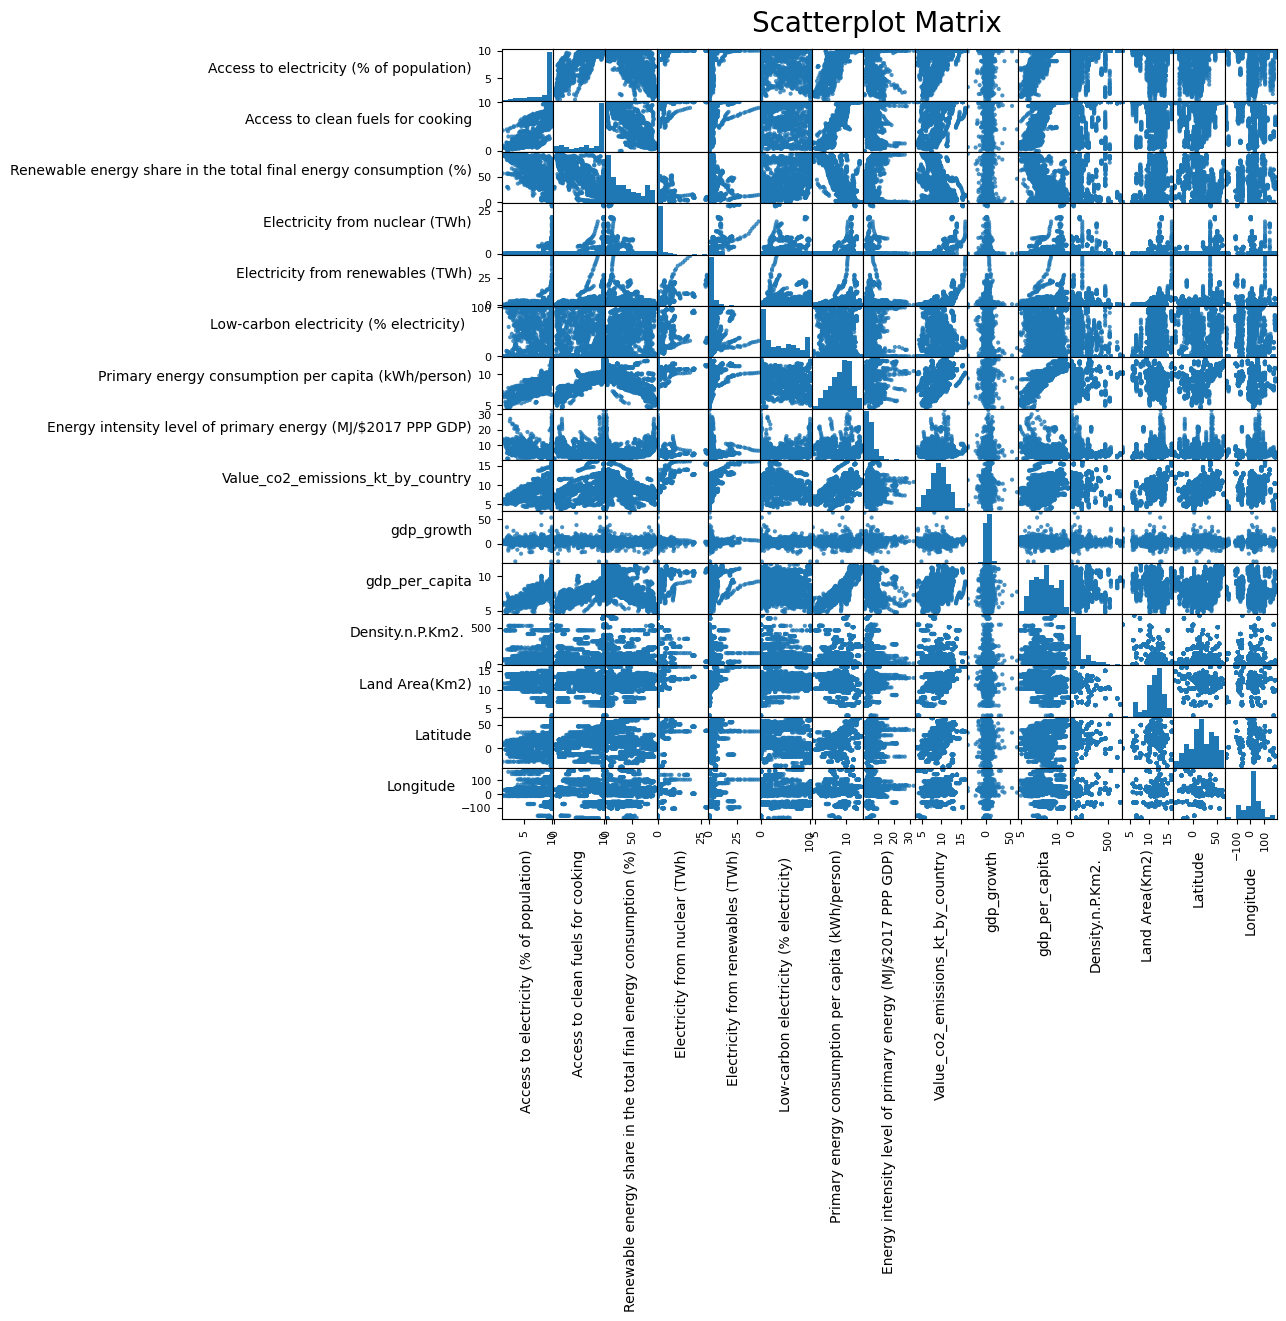

In [19]:
scatter_matrix =pd.plotting.scatter_matrix(data.iloc[:, 2:], figsize=(10, 10), alpha=0.8)
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation('horizontal')
    ax.yaxis.label.set_horizontalalignment('right')
    #ax.yaxis.label.set_va('center')
    #ax.yaxis.label.set_fontsize(4) 
plt.suptitle("Scatterplot Matrix", y=0.92, fontsize=20)
plt.show()

# enlever land Area, latidtude et longitude ??

/tmp/ipykernel_5390/2937997379.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_data.corr()


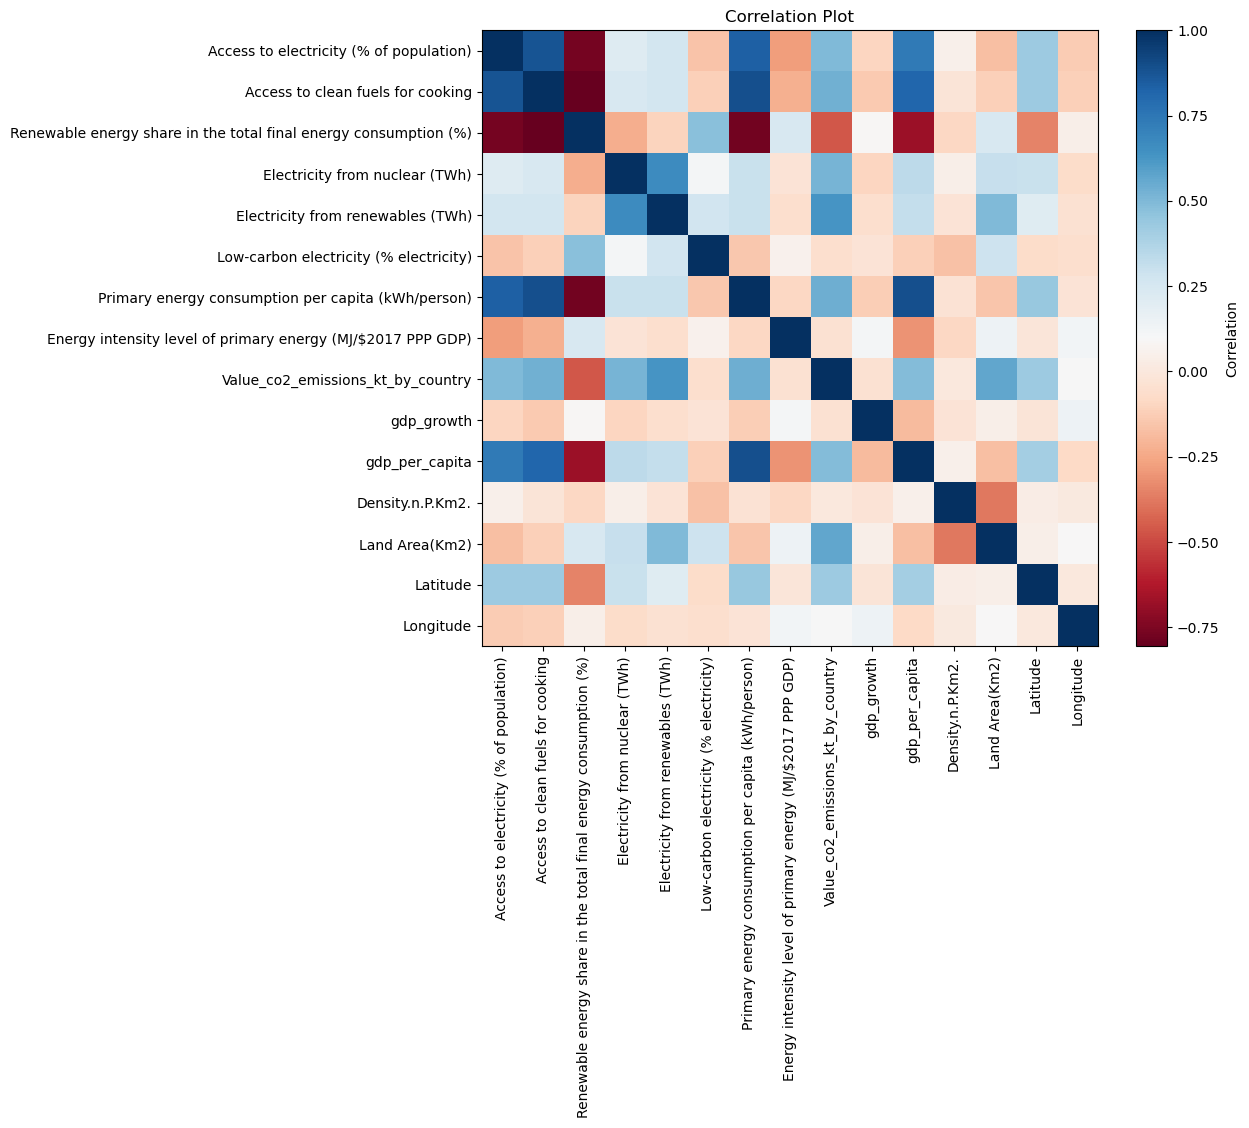

In [20]:
clean_data = data.iloc[:, 2:].dropna()

corr = clean_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Question 7



The following commands perform a Principal Component Analysis (PCA) on quantitative variables.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data_quantitative = data_complete.select_dtypes(include='number')

X=scale(data_quantitative)

# PCA on quantitative variables
pca = PCA()
C = pca.fit(X).transform(X)

# Create a DataFrame with the first 10 eigenvalues and their cumulative percentage of variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalues': pca.explained_variance_[:10],
    'Cumulative Variance (%)': pca.explained_variance_ratio_[:10].cumsum() * 100
})

print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
print(eigenvalues_df)

Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:
   Eigenvalues  Cumulative Variance (%)
0     4.148883                27.649578
1     2.689456                45.573034
2     1.359120                54.630678
3     1.300231                63.295861
4     1.032853                70.179148
5     0.908151                76.231380
6     0.850983                81.902624
7     0.719269                86.696081
8     0.640892                90.967208
9     0.527619                94.483439


We observe a cumulative percentage of variance of 90.917527 corrisponding to 9 eigenvalues. Then, we will keep 9 dimensions as 90.917527% > 85%.

The next plot shows the percentage of explained variance corresponding to each dimension.

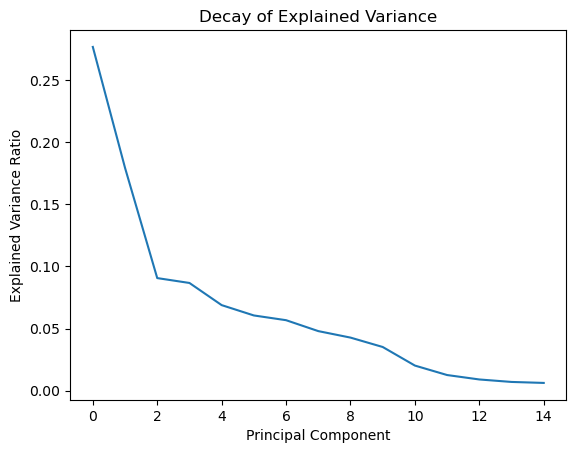

In [22]:
# Decay of Explained Variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Decay of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

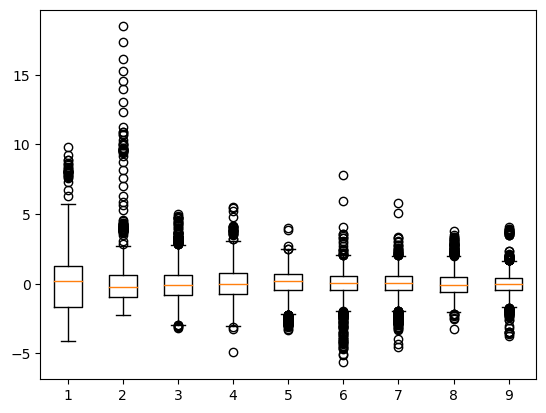

In [23]:
# Boxplots for individual coordinates
plt.boxplot(C[:,0:9])
plt.show()

In [24]:
# Correlation matrix between variables and dimensions 
#
#
#
#
#
#

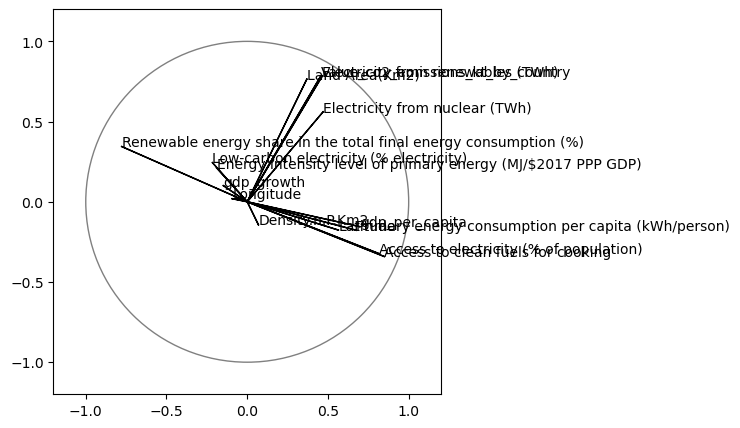

In [25]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

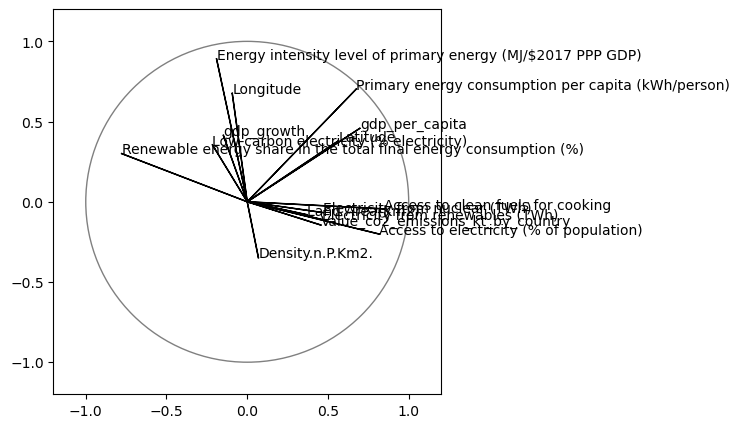

In [26]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 3
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

-------- legge inn matrise med forskjellige dimensioner for aa se hvilke dimensjoner som representerer best de forskjellige variablene

## Question 8

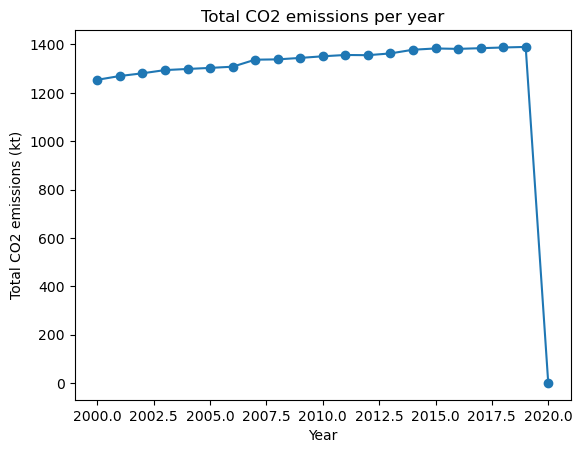

In [27]:
# Grouping the data by year and sum the CO2 emissions
sum_co2_by_year = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum()

plt.plot(sum_co2_by_year.index, sum_co2_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Total CO2 emissions (kt)')
plt.title('Total CO2 emissions per year')
plt.show()


In [28]:
data['Year'].corr(data['Value_co2_emissions_kt_by_country'])

0.047144628350175355

In [29]:
from sklearn.linear_model import LinearRegression

X = data[['Year']] 
y = data['Value_co2_emissions_kt_by_country']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Score:",  model.score(X, y))

Intercept: -29.96291057917871
Score: 0.0022226159822761327


# Modelisation
In this section we are predicting the Value-co2-emissions variable using different regression methods.

## Question 1 : Splitting the data set 

In [30]:
# Checking if all missing values are removed: 
data.isna().sum().sum()

0

In [31]:
# Qualitative data transformed to dummies 
dataDum=pd.get_dummies(data[["Year"]]) 
# We dont use the varaible Entity in the regression beacouse it would give us ... extra dummy variables

del dataDum["Year_2000"]

# Quantitaive data  'Value_co2_emissions_kt_by_country',
dataQuant=data[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
dfC=pd.concat([dataDum,dataQuant],axis=1)
dfC.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,0,0,1,0,0,0,0,0,0,0,...,0.793725,67.021280,5.437941,1.40,8.832278,5.250617,60.0,13.388153,33.93911,67.709953
1,0,0,0,1,0,0,0,0,0,0,...,0.748331,62.921350,5.319253,1.20,1.414118,5.353667,60.0,13.388153,33.93911,67.709953
2,0,0,0,0,1,0,0,0,0,0,...,0.768115,63.440857,5.529703,1.41,11.229715,5.489067,60.0,13.388153,33.93911,67.709953
3,0,0,0,0,0,1,0,0,0,0,...,0.800000,76.190475,5.718411,1.50,5.357403,5.574940,60.0,13.388153,33.93911,67.709953
4,0,0,0,0,0,0,1,0,0,0,...,0.866025,78.947370,5.870087,1.53,13.826320,5.885251,60.0,13.388153,33.93911,67.709953


Defining the two training/testing sets

We start the modedeling part of this project by dividing the data set into a training set and a test set. We affect 20% of the data to the test set.

In [32]:
# variable to explain
Yr=data["Value_co2_emissions_kt_by_country"]

In [33]:
from sklearn.model_selection import train_test_split
# Splitting innto test and training sets, with the test set beeing 20% of the data 

X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=0.2,random_state=11)

Why is this step necessary when we’re focusing on algorithm performance? ------------

Standardization of data using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  

Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)

## Question 2 : Exploration of regression models 

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
from sklearn.model_selection import GridSearchCV

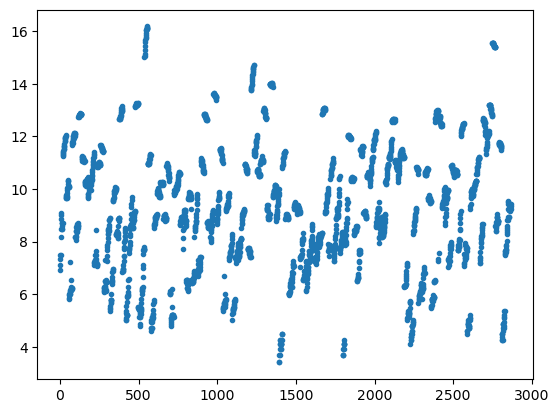

In [36]:
plt.plot(data["Value_co2_emissions_kt_by_country"],".")

### Linear models

#### Linear regression

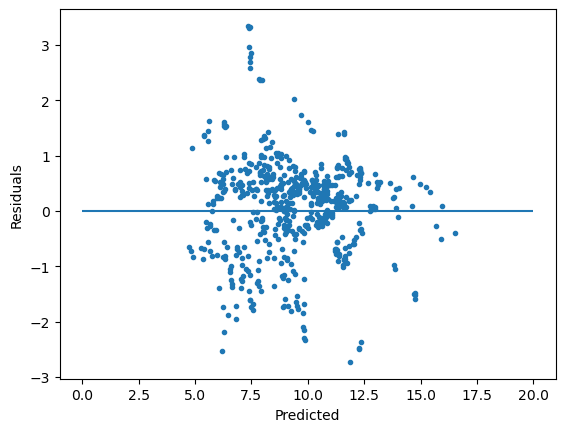

In [37]:
lr_model = LinearRegression(n_jobs=-1)
lr_model_fit=lr_model.fit(X_train, Yr_train)
lr_pred = lr_model_fit.predict(X_test)
lr_mse = mean_squared_error(Yr_test, lr_pred)
lr_r2 = r2_score(Yr_test, lr_pred)

plt.plot(lr_pred, Yr_test - lr_pred, ".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()



In [38]:
print("MSE: ", lr_mse)
print("R2: ", lr_r2)

MSE:  0.7728100655104393
R2:  0.8548204202854456


#### Ridge regression

Ridge without cross validation

In [39]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(Xr_train, Yr_train)
ridge_pred = ridge_model.predict(Xr_test)
ridge_mse = mean_squared_error(Yr_test, ridge_pred)
ridge_r2 = r2_score(Yr_test, ridge_pred)

print("Ridge MSE: ", ridge_mse)
print("Ridge R2: ", ridge_r2)

Ridge MSE:  0.7728230706304602
Ridge R2:  0.8548179771523357


Ridge with cross validation

Best Ridge MSE:  0.7729887188959464
Best Ridge R2:  0.8547868585804679
Alpha : 7


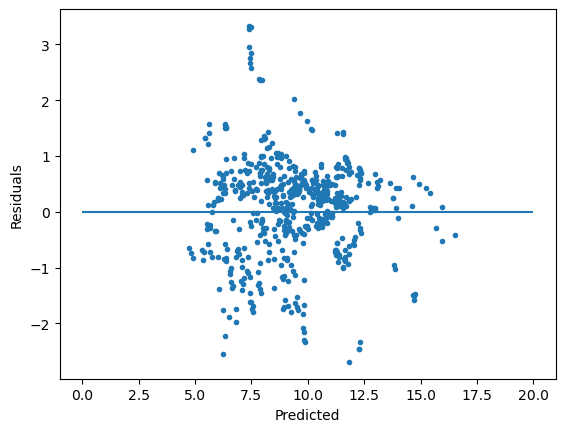

In [40]:
ridge_params = [{"alpha":[0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9]}] #{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=10)
ridge_grid_opt =ridge_grid.fit(Xr_train, Yr_train)
best_ridge_model = ridge_grid_opt.best_estimator_

best_ridge_pred = ridge_grid_opt.predict(Xr_test)
best_ridge_mse = mean_squared_error(Yr_test, best_ridge_pred)
best_ridge_r2 = r2_score(Yr_test, best_ridge_pred)

print("Best Ridge MSE: ", best_ridge_mse)
print("Best Ridge R2: ", best_ridge_r2)
print("Alpha :",ridge_grid_opt.best_params_["alpha"])

plt.plot(best_ridge_pred,Yr_test-best_ridge_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [41]:
print("MSE : ",best_ridge_mse)
print("R2 : ",best_ridge_r2)

MSE :  0.7729887188959464
R2 :  0.8547868585804679


In [42]:
# Coefficients
regRidge=Ridge(alpha=ridge_grid_opt.best_params_['alpha'])
model_ridge=regRidge.fit(Xr_train,Yr_train)
model_ridge.coef_

array([-0.00361936, -0.01520752, -0.02191342, -0.01619856, -0.01442079,
       -0.022096  , -0.02092627, -0.03022355, -0.00669743, -0.01669747,
       -0.03068117, -0.02157588, -0.02802282, -0.01720097, -0.01901438,
       -0.01153506, -0.02060429, -0.03176297, -0.01339963,  0.        ,
        0.40771906, -0.06554412, -0.39725169,  0.10084613,  0.26571473,
       -0.23977874,  0.55270546,  0.0397718 ,  0.00822966,  0.22754046,
        0.54392086,  1.72356387,  0.20803137,  0.18265617])

In [43]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
print("Ridge conserve " + str(sum(coef != 0)) + 
      " variables and delete " +  str(sum(coef == 0)))

Ridge conserve 33 variables and delete 1


In [44]:
imp_coef = coef[coef != 0].sort_values()
print("Ridge model coefficients: ")
print(imp_coef)

Ridge model coefficients: 
Renewable energy share in the total final energy consumption (%)   -0.397252
Low-carbon electricity (% electricity)                             -0.239779
Access to clean fuels for cooking                                  -0.065544
Year_2018                                                          -0.031763
Year_2011                                                          -0.030681
Year_2008                                                          -0.030224
Year_2013                                                          -0.028023
Year_2006                                                          -0.022096
Year_2003                                                          -0.021913
Year_2012                                                          -0.021576
Year_2007                                                          -0.020926
Year_2017                                                          -0.020604
Year_2015                                        

#### Lasso regression

Lasso without cross validation

In [45]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(Xr_train, Yr_train)
lasso_pred = lasso_model.predict(Xr_test)
lasso_mse = mean_squared_error(Yr_test, lasso_pred)
lasso_r2 = r2_score(Yr_test, lasso_pred)

print("Lasso MSE: ", lasso_mse)
print("Lasso R2: ", lasso_r2)

Lasso MSE:  3.5487302387845956
Lasso R2:  0.33333792146355223


Lasso with cross validation

Best Lasso MSE:  0.7643227637613855
Best Lasso R2:  0.8564148390900511
Alpha :  0.01


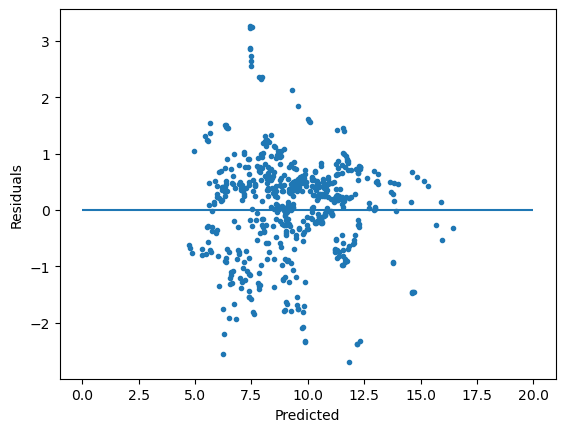

In [46]:
lasso_params = {'alpha': [0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=10,n_jobs=-1)
lasso_grid_opt=lasso_grid.fit(Xr_train, Yr_train)
best_lasso_model = lasso_grid_opt.best_estimator_
best_lasso_pred = lasso_grid_opt.predict(Xr_test)

best_lasso_mse = mean_squared_error(Yr_test, best_lasso_pred)
best_lasso_r2 = r2_score(Yr_test, best_lasso_pred)

print("Best Lasso MSE: ", best_lasso_mse)
print("Best Lasso R2: ", best_lasso_r2)
print("Alpha : ",lasso_grid_opt.best_params_["alpha"])

plt.plot(best_lasso_pred,Yr_test-best_lasso_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()


In [47]:
print("MSE : ",best_lasso_mse)
print("R2 : ",best_lasso_r2)

MSE :  0.7643227637613855
R2 :  0.8564148390900511


In [48]:
# Coefficients
regLasso=Lasso(alpha=lasso_grid_opt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_

array([ 5.53412646e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.33441842e-04,
        2.02793436e-03,  0.00000000e+00, -2.17456375e-04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.47478036e-04,  0.00000000e+00,  0.00000000e+00,
        3.55216935e-01, -0.00000000e+00, -3.70573282e-01,  1.04432500e-01,
        2.63626358e-01, -2.40595560e-01,  6.11723609e-01,  1.14300190e-02,
        0.00000000e+00,  1.51327585e-01,  5.39487600e-01,  1.71042769e+00,
        2.06956730e-01,  1.74124529e-01])

In [49]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables and delete " +  str(sum(coef == 0)))

Lasso conserve 17 variables and delete 17


In [50]:
imp_coef = coef[coef != 0].sort_values()
print("Lasso model coefficients: ")
print(imp_coef)

Lasso model coefficients: 
Renewable energy share in the total final energy consumption (%)   -0.370573
Low-carbon electricity (% electricity)                             -0.240596
Year_2008                                                          -0.000933
Year_2018                                                          -0.000847
Year_2011                                                          -0.000217
Year_2001                                                           0.000055
Year_2009                                                           0.002028
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.011430
Electricity from nuclear (TWh)                                      0.104433
gdp_per_capita                                                      0.151328
Longitude                                                           0.174125
Latitude                                                            0.206957
Electricity from renewables (TWh)                

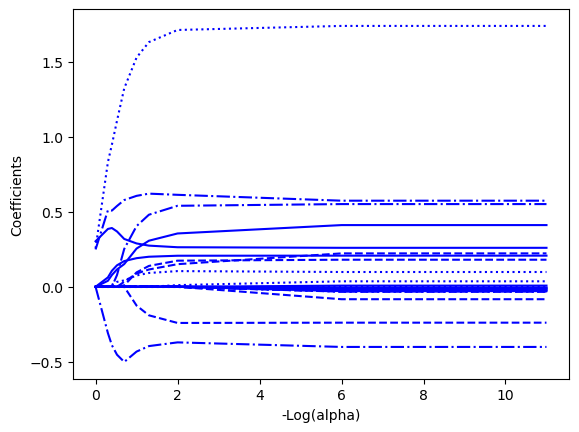

In [51]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yr_train, alphas=[1e-10,1e-11,1e-09, 1e-08, 1e-07, 1e-06,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1],)

plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

### KNN

Best score = 0.005380, Best number of neighbors = {'n_neighbors': 1}


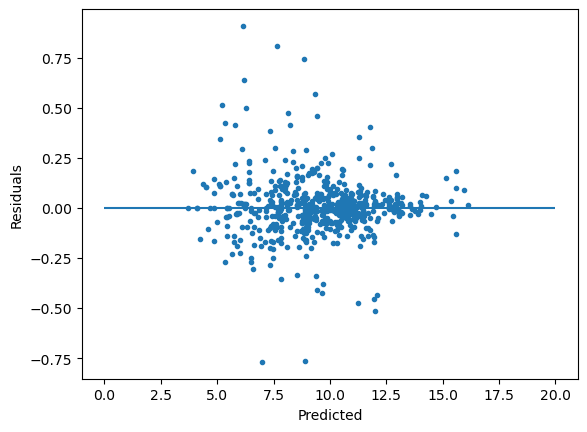

In [52]:
knnr_params=[{"n_neighbors":list(range(1,15))}]
knnr_grid = GridSearchCV(KNeighborsRegressor(), knnr_params, cv=10, n_jobs=-1)
knnr_grid_opt= knnr_grid.fit(X_train, Yr_train)
best_knnr_model = knnr_grid_opt.best_estimator_
best_knnr_pred = knnr_grid_opt.predict(X_test)
best_knnr_mse = mean_squared_error(Yr_test, best_knnr_pred)
best_knnr_r2 = r2_score(Yr_test, best_knnr_pred)

print("Best score = %f, Best number of neighbors = %s" % (1.-knnr_grid_opt.best_score_,knnr_grid_opt.best_params_))

plt.plot(best_knnr_pred,Yr_test-best_knnr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [2]:
print("MSE : ",best_knnr_mse)
print("R2 : ",best_knnr_r2)

NameError: name 'best_knnr_mse' is not defined

### SVM

SVM is a powerful regression tool. SVM finds the optimal hyperplane that best separates data points into different classes while maximizing the margin between classes.

To justify the choice of kernel, we will perform a cross_validation on each kernel. When we have found the best values for cost and gamma, we re-perform the svm algorithm on each kernel. Then we calculate the mean squared error nd R² value to choose the best one. The different kernels are; 

- Linear Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \langle \mathbf{x}, \mathbf{x'} \rangle .$
- Gaussian Kernel (RBF): $ k(\mathbf{x}, \mathbf{x'}) = e^{- \frac{\| \mathbf{x} - \mathbf{x'} \|^2}{2\sigma^2}} $ It returns values in an infinite-dimensional space.

- $p$ degree Polynomial Kernel: $ k(\mathbf{x}, \mathbf{x'}) = (1 + \langle \mathbf{x}, \mathbf{x'} \rangle)^p $. The default value of $p$ is 3. This is the value we chose to test.

- Sigmoid Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \tanh(\kappa \langle \mathbf{x}, \mathbf{x'} \rangle + \theta) $. (This kernel is not positive definite).

#### Linear kernel 

In [ ]:
# SVM regression
svmr_params_l = {'C': [0.1,0.3,0.5,0.8,1,1.4, 1.8, 2], 'gamma': ['scale', 'auto'], 'kernel': ['linear'], 'epsilon': [0.01,0.1,0.5,1]} 
svmr_grid_l = GridSearchCV(SVR(), param_grid=svmr_params_l, cv=10)
svmr_grid_opt_l = svmr_grid_l.fit(Xr_train, Yr_train)
best_svmr_model_l = svmr_grid_opt_l.best_estimator_
best_svmr_pred_l = svmr_grid_opt_l.predict(Xr_test)
best_svmr_mse_l = mean_squared_error(Yr_test, best_svmr_pred_l)
best_svmr_r2_l = r2_score(Yr_test, best_svmr_pred_l)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_l.best_score_,svmr_grid_opt_l.best_params_))


KeyboardInterrupt: 

#### Gaussian kernel (RBF)

In [ ]:
svmr_params_r = {'C': [4,6,8,10,12], 'gamma': ['scale', 'auto'], 'kernel': [ 'rbf'],'epsilon': [0.01,0.1,0.5,1]} 
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
svmr_grid_r = GridSearchCV(SVR(), param_grid=svmr_params_r, cv=10)
svmr_grid_opt_r = svmr_grid_r.fit(Xr_train, Yr_train)
best_svmr_model_r = svmr_grid_opt_r.best_estimator_
best_svmr_pred_r = svmr_grid_opt_r.predict(Xr_test)
best_svmr_mse_r = mean_squared_error(Yr_test, best_svmr_pred_r)
best_svmr_r2_r = r2_score(Yr_test, best_svmr_pred_r)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_r.best_score_,svmr_grid_opt_r.best_params_))

Best score = 0.947221, Best parameters = {'C': 12, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


#### Polynomial kernel

In [ ]:
svmr_params_p = {'C': [4,5,6,7,8,9,10], 'gamma': ['scale', 'auto'], 'kernel': ['poly'],'epsilon': [0.01,0.1,0.5,1], "degree":[2,3,4]} 
svmr_grid_p = GridSearchCV(SVR(), param_grid=svmr_params_p, cv=10)
svmr_grid_opt_p = svmr_grid_p.fit(Xr_train, Yr_train)
best_svmr_model_p = svmr_grid_opt_p.best_estimator_
best_svmr_pred_p = svmr_grid_opt_p.predict(Xr_test)
best_svmr_mse_p = mean_squared_error(Yr_test, best_svmr_pred_p)
best_svmr_r2_p = r2_score(Yr_test, best_svmr_pred_p)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_p.best_score_,svmr_grid_opt_p.best_params_))

Best score = 0.906084, Best parameters = {'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'poly'}


#### Sigmoid kernel

In [ ]:
svmr_params_s = {'C': [0.4,0.5,0.6,0.8,1,1.4, 1.8, 2], 'gamma': ['scale', 'auto'], 'kernel': ['sigmoid'],'epsilon': [0.01,0.1,0.5,1]} 
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
svmr_grid_s = GridSearchCV(SVR(), param_grid=svmr_params_s, cv=10)
svmr_grid_opt_s = svmr_grid_s.fit(Xr_train, Yr_train)
best_svmr_model_s = svmr_grid_opt_s.best_estimator_
best_svmr_pred_s = svmr_grid_opt_s.predict(Xr_test)
best_svmr_mse_s = mean_squared_error(Yr_test, best_svmr_pred_s)
best_svmr_r2_s = r2_score(Yr_test, best_svmr_pred_s)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_s.best_score_,svmr_grid_opt_s.best_params_))

Best score = 0.683401, Best parameters = {'C': 0.4, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


#### Colclusion on SVM

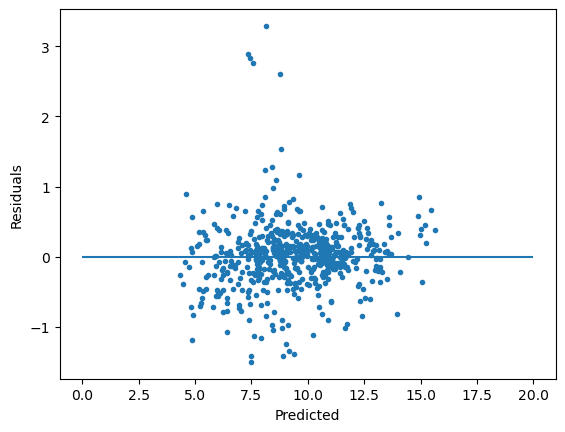

In [ ]:
plt.plot(best_svmr_pred_r,Yr_test-best_svmr_pred_r,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [ ]:
print("Best MSE : ",best_svmr_mse_r)
print("Best R2 : ",best_svmr_r2_r)

### Optimal tree (CART)

Optimal trees, or decision trees, use the CART algorithm for it's regression. The CART algorithm is a nonparametric method that creates decision rules from the given dataset. We will see that it is easy to interpret and the prediction of new values can be seen as a long list of if loops. 

The only parameter we set for the cross validation of the decision tree regressor is the max depth of the tree. This parameter makes sure we do not overfit our model, and controls the complexity of the tree.

Best score = 0.023561, Best parameters = {'max_depth': 9}


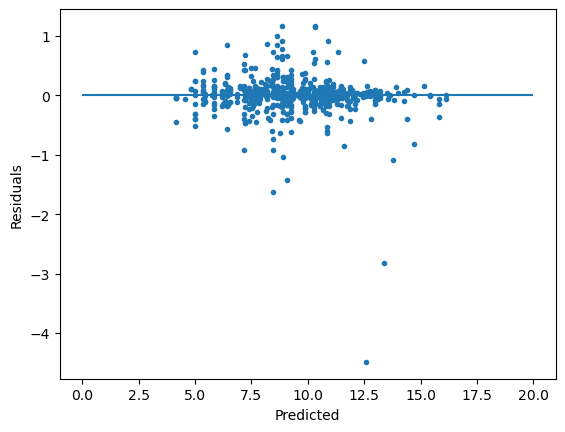

In [ ]:
dtr_params = {"max_depth":list(range(2,10,1))} 
dtr_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr_params, cv=10)
dtr_grid_opt = dtr_grid.fit(Xr_train, Yr_train)
best_dtr_model = dtr_grid_opt.best_estimator_
best_dtr_pred = dtr_grid_opt.predict(Xr_test)
best_dtr_mse = mean_squared_error(Yr_test, best_dtr_pred)
best_dtr_r2 = r2_score(Yr_test, best_dtr_pred)

print("Best score = %f, Best parameters = %s" % (1.-dtr_grid_opt.best_score_,dtr_grid_opt.best_params_))

plt.plot(best_dtr_pred,Yr_test-best_dtr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

A clear pattern can be observed in the residual plot. This is because multiple observations fall under the same leaf after the final stage, resulting in the same predictions.

Next we will plot a visual representation of the tree.

Full tree: 

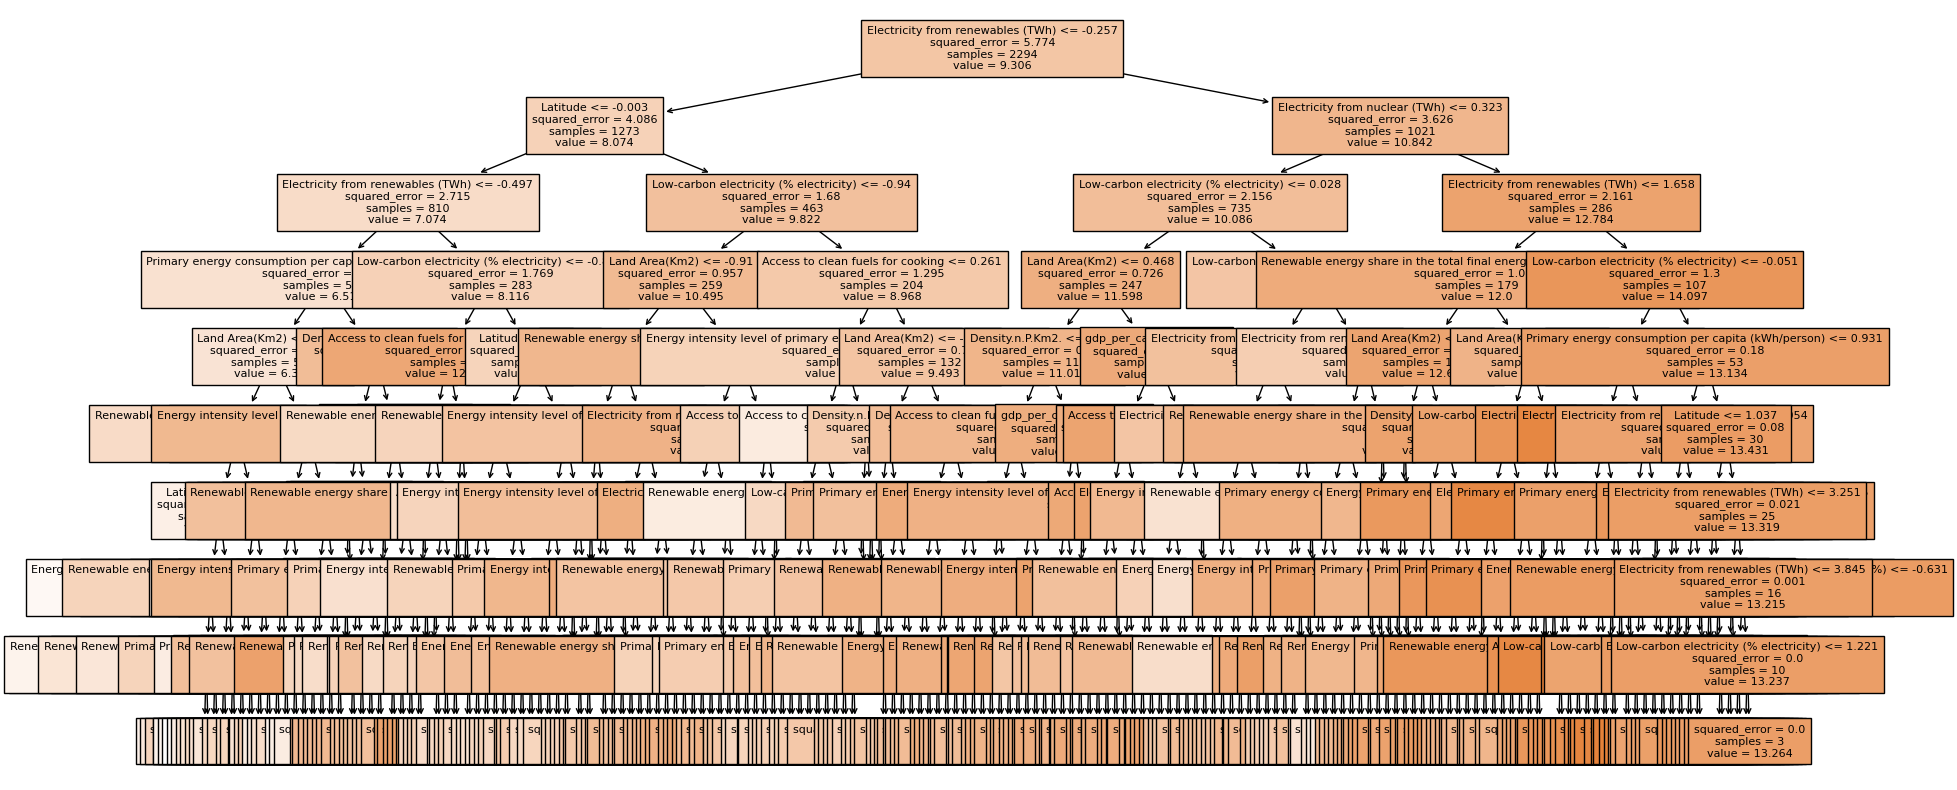

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtr_model, filled=True, feature_names=dfC.columns.tolist(), fontsize=8)
plt.show()

Top 4 layers:

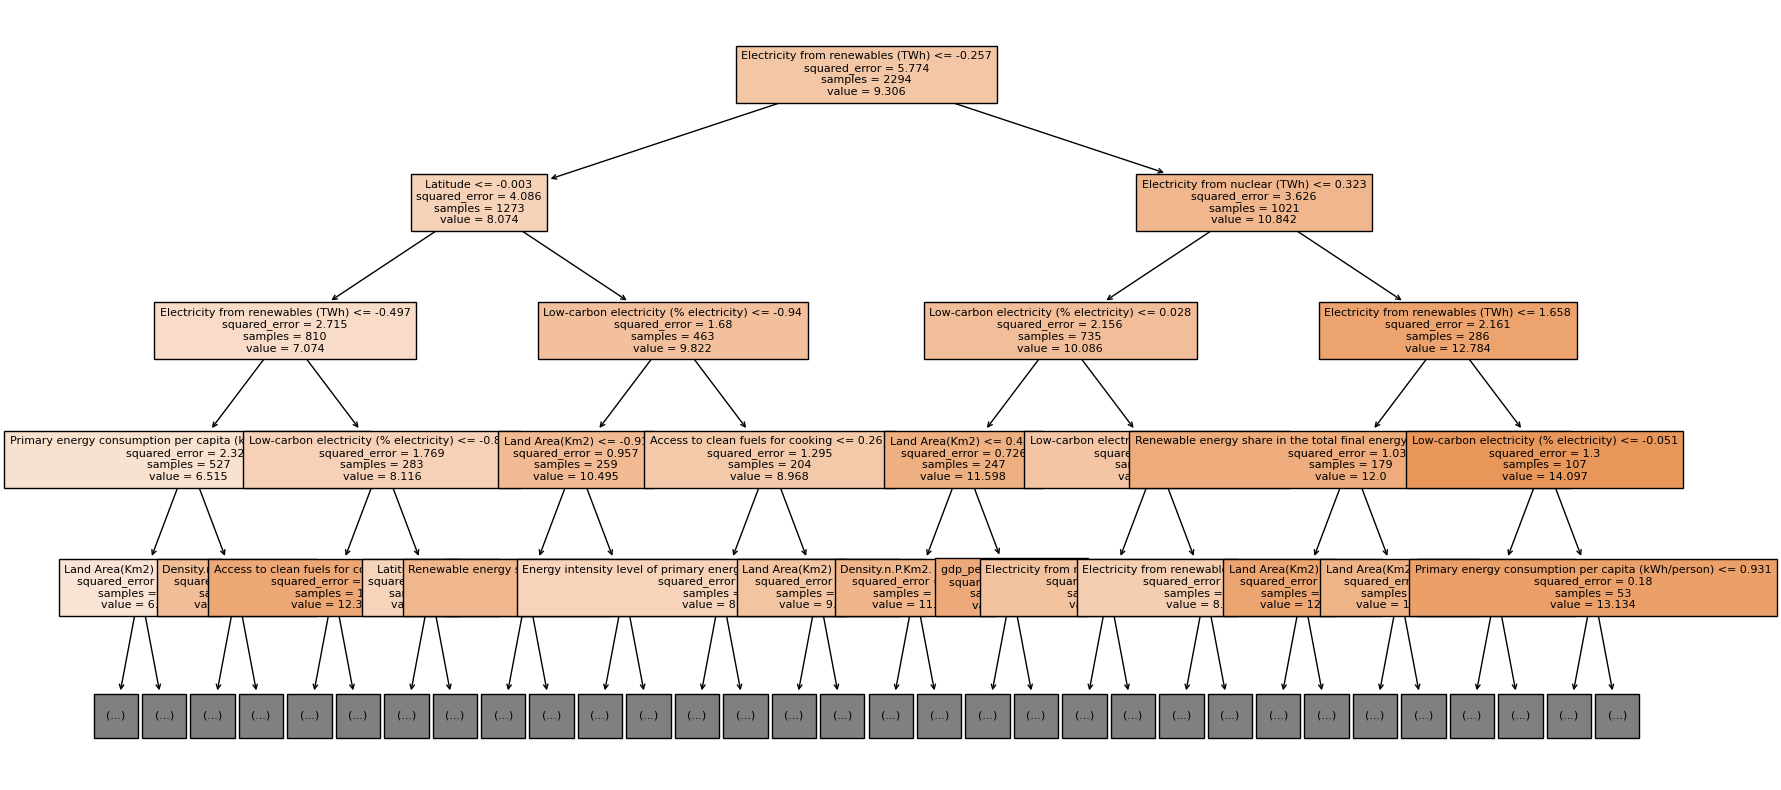

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_dtr_model, filled=True, feature_names=dfC.columns.tolist(), fontsize=8, max_depth=4)
plt.show()


In [ ]:
print("Best MSE : ",best_dtr_mse)
print("Best R2 : ",best_dtr_r2)

Best MSE for optimal tree regression:  0.12320382641636239
Best R2 for optimal tree regression:  0.9768550119406917


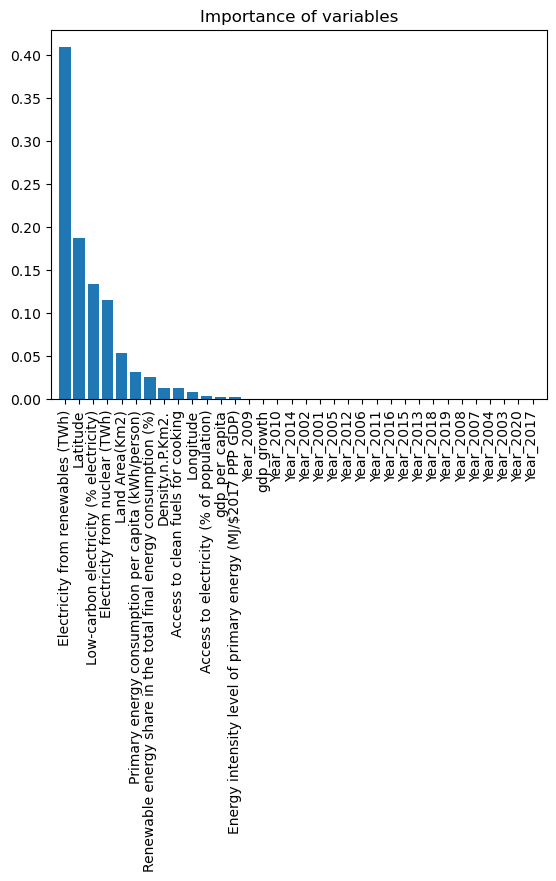

In [ ]:
dt= DecisionTreeRegressor(max_depth=9)
dtFit=dt.fit(Xr_train, Yr_train)

importances = dtFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

From the above plot we can see that the most important variable used in the regression is Elictricity form renewables (TWh), twice as important as the second most important variable Latituse. None of the year variables are important to the regression model.

### Random forest

The random forest regressor uses binary decision trees and bagging (bootstrap aggregation) to make its model. In addition, it introduces randomness to the model which makes it more independent and improves the prediction accuracy of the model. The algorithm works as follows; For each bootstrap sample, a decision tree is estimated, the randomisation takes place in the selection of predictors used in each stage of the construction of the tree. When all of the estimators are made, a mean estimate is calculated of all the values predicted by all the trees in the forest.   

The parameters optimised in the grid search are n_estimators and max_features. n_estimators is the number of trees estimated for each bootstrap. max_features is the maximum number of variables chosen randomly for each node. These two variables helps to control the balance between complexity and performance of the final model, i.e., makes sure the model is not overfitted, but sill insures accuracy. 

Best score = 0.003997, Best parameters = {'max_features': 9, 'n_estimators': 500}


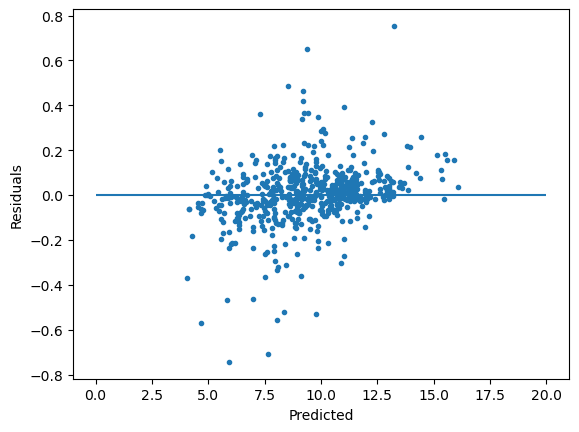

In [ ]:
rfr_params =[{"max_features":list(range(2,10,1)), "n_estimators": [100,300,500]}]
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=10)
rfr_grid_opt=rfr_grid.fit(Xr_train, Yr_train)
best_rfr_model = rfr_grid.best_estimator_
best_rfr_pred = rfr_grid_opt.predict(Xr_test)
best_rfr_mse = mean_squared_error(Yr_test, best_rfr_pred)
best_rfr_r2 = r2_score(Yr_test, best_rfr_pred)

print("Best score = %f, Best parameters = %s" % (1.-rfr_grid_opt.best_score_,rfr_grid_opt.best_params_))

plt.plot(best_rfr_pred,Yr_test-best_rfr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [ ]:
print("MSE : ",best_rfr_mse)
print("R2 : ",best_rfr_r2)

NameError: name 'best_rfr_mse' is not defined

We se a clear improvment of the residuals, and the MSE and the R2 form the desission tree model to this random forest model. 

Importance of variables in the optimised model :

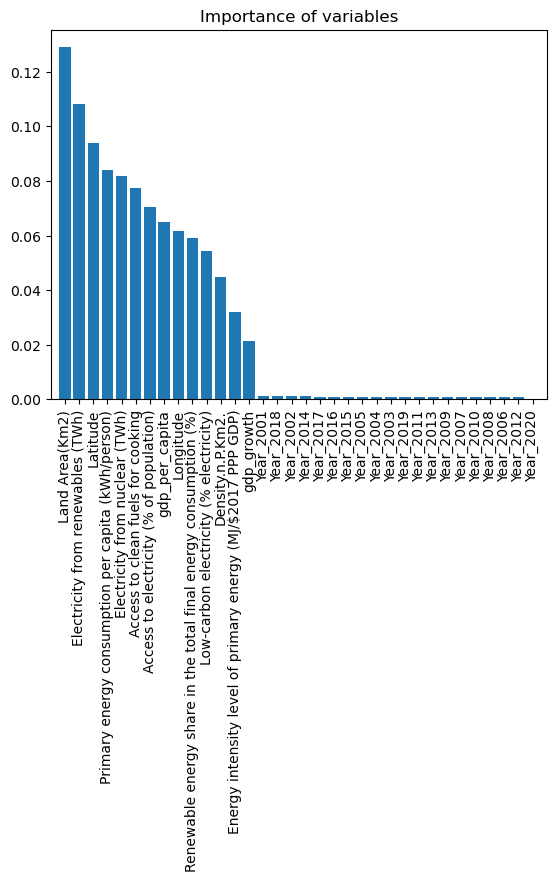

In [ ]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Yr_train)

importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

From the above plot we can see that the most important variables used in the random forest regression are Elictricity form renewables (TWh) and Land Area (Km2). Similarly to the decision tree regressor, none of the year variables are important to the regression model. In contrast to the decision tree model, in this model several of the variables are equally important to the model, and one is not much more important than the others as in the decision tree model.

### Boosting

In addition to reducing the variance as in bagging, aggregation by boosting allows to also reduce thh bias in the model. To make a regression model using boosting we will preform a gradiant boosting model (GBM). In this regression model regression trees are used to calculate the gardient of the loss function we want to reduce. 

The parameters optimised for the model is  n_estimators, learning_rate, and max_depth. n_estimators is the number of boosting stages to calculate, to high values can lead to overfitting, but i higher value can reduce the training error. The learning_rate is used to shrink the weight of each trees in the algorithim used in shinkage methods to avoid overfitting. 

Best score = 0.004859, Best parameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


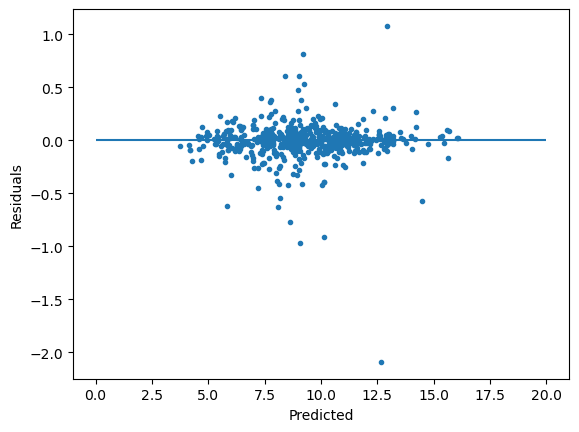

In [ ]:
gbr_params = {'n_estimators': [100,300,500], 'learning_rate': [0.01, 0.1,0.2, 0.5], 'max_depth': [3, 5, 7]}
gbr_grid = GridSearchCV(GradientBoostingRegressor(), param_grid=gbr_params, cv=10)
gbr_grid_opt = gbr_grid.fit(Xr_train, Yr_train)
best_gbr_model = gbr_grid_opt.best_estimator_
best_gbr_pred = gbr_grid_opt.predict(Xr_test)
best_gbr_mse = mean_squared_error(Yr_test, best_gbr_pred)
best_gbr_r2 = r2_score(Yr_test, best_gbr_pred)

print("Best score = %f, Best parameters = %s" % (1.-gbr_grid_opt.best_score_,gbr_grid_opt.best_params_))

plt.plot(best_gbr_pred,Yr_test-best_gbr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [ ]:
print("MSE : ",best_gbr_mse)
print("R2 : ",best_gbr_r2)

MSE :  0.03232157141104477
R2 :  0.9939280913091239


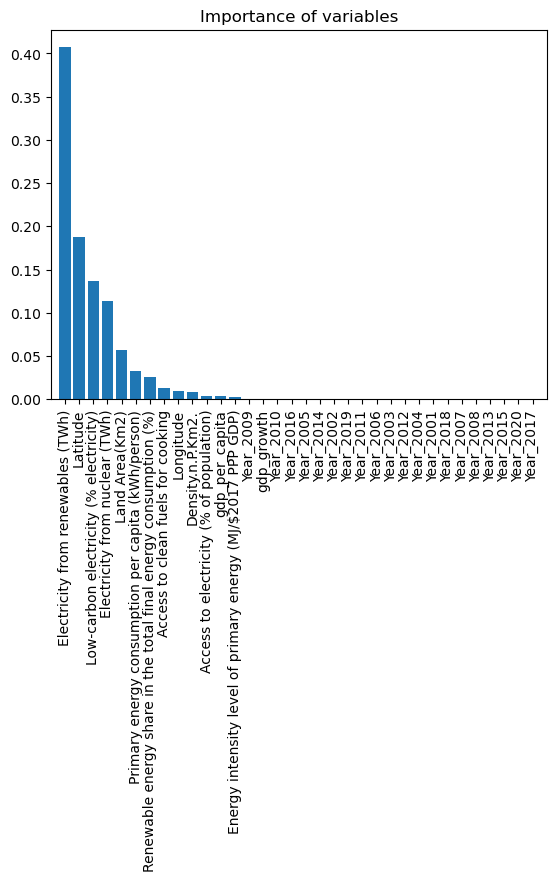

In [ ]:
gb= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=5)
gbFit=rf.fit(Xr_train, Yr_train)

importances = gbFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

### Neural networks

In this version of a neural network algorithm, we use the default adaptive learning rate optimisation algorithm called Adam (Adaptive moments). We also use RELU, the default activation function, as activation function for the hidden layer of the network.

The only parameter we optimise in this cross validation is the number of hidden layers to use in the final model. We set the max number of animations to 500.

/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopda

Best score = 0.093796, Best parameters = {'hidden_layer_sizes': (9,)}


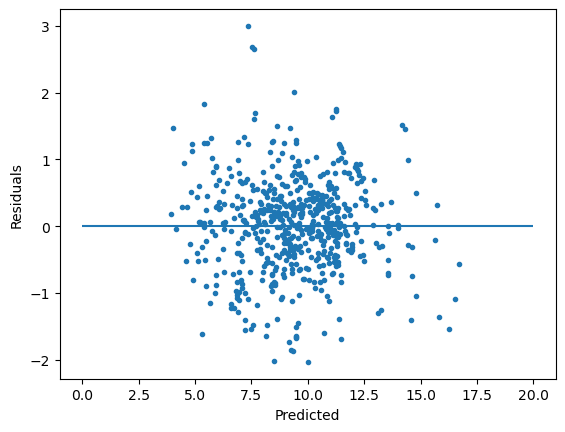

In [ ]:
nnr_params = [{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,),(9,),(10,)])}]
nnr_grid = GridSearchCV(MLPRegressor(max_iter=500,early_stopping=True),nnr_params,cv=10,n_jobs=-1)
nnr_grid_opt = nnr_grid.fit(Xr_train, Yr_train)
best_nnr_model = nnr_grid_opt.best_estimator_
best_nnr_pred = nnr_grid_opt.predict(Xr_test)
best_nnr_mse = mean_squared_error(Yr_test, best_nnr_pred)
best_nnr_r2 = r2_score(Yr_test, best_nnr_pred)

print("Best score = %f, Best parameters = %s" % (1.-nnr_grid_opt.best_score_,nnr_grid_opt.best_params_))

plt.plot(best_nnr_pred,Yr_test-best_nnr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [ ]:
print("MSE : ",best_nnr_mse)
print("R2 : ",best_nnr_r2)

MSE :  0.5025689510667566
R2 :  0.9055877344904087


### Question 3

Compare the different optimized models on your test sample. Which models perform best? How accurate
are they?

In [ ]:
print("Mean Squared Error for the regression models:")
print("Linear regression: ", lr_mse)
print("Ridge: ", best_ridge_mse)
print("Lasso: ", best_lasso_mse)
print("KNN: ", best_knnr_mse)
print("Support Vector Machine model: ", best_svmr_mse_r)
print("Optimal tree model: ", best_dtr_mse)
print("Random forest model: ", best_rfr_mse)
print("Boosting model: ", best_gbr_mse)
print("Neural network model: ", best_nnr_mse)


Mean Squared Error for the regression models:
Linear regression:  0.772810065510439
Ridge:  0.7729887188959466
Lasso:  0.7643227637613852
KNN:  0.022701316925733978
Support Vector Machine model:  0.23797142855391237
Optimal tree model:  0.12320382641636239
Random forest model:  0.019148519565832793
Boosting model:  0.03232157141104477
Neural network model:  0.5025689510667566


-- randomforest best, then knn, boosting

In [ ]:
print("R2 for the regression models:")
print("Linear regression: ", lr_r2)
print("Ridge: ", best_ridge_r2)
print("Lasso: ", best_lasso_r2)
print("KNN: ", best_knnr_r2)
print("Support Vector Machine model: ", best_svmr_r2_r)
print("Optimal tree model: ", best_dtr_r2)
print("Random forest model: ", best_rfr_r2)
print("Boosting model: ", best_gbr_r2)
print("Neural network model: ", best_nnr_r2)

R2 for the regression models:
Linear regression:  0.8548204202854457
Ridge:  0.8547868585804679
Lasso:  0.8564148390900511
KNN:  0.9957353458536179
Support Vector Machine model:  0.9552948473067443
Optimal tree model:  0.9768550119406917
Random forest model:  0.9964027719787949
Boosting model:  0.9939280913091239
Neural network model:  0.9055877344904087


-- randomforest best, then knn, boosting

In [ ]:
#print("Linear regression: %f" % (lr_model_fit.score_))
print("Ridge:  %f" % (ridge_grid_opt.best_score_))
print("Lasso: %f" % (lasso_grid_opt.best_score_))
print("KNN:  %f" % (knnr_grid_opt.best_score_))
print("SVM: %f" % (svmr_grid_opt_r.best_score_))
print("Optimal tree model:  %f" % (dtr_grid_opt.best_score_))
print("Random forest model: %f" % (rfr_grid_opt.best_score_))
print("Boosting model:  %f" % (gbr_grid_opt.best_score_))
print("Neural network model:  %f" % (nnr_grid_opt.best_score_))


Ridge:  0.860086
Lasso: 0.861649
KNN:  0.994620
SVM: 0.947221
Optimal tree model:  0.976439
Random forest model: 0.996003
Boosting model:  0.995141
Neural network model:  0.906204


-- randomforest best,  boosting, KNN

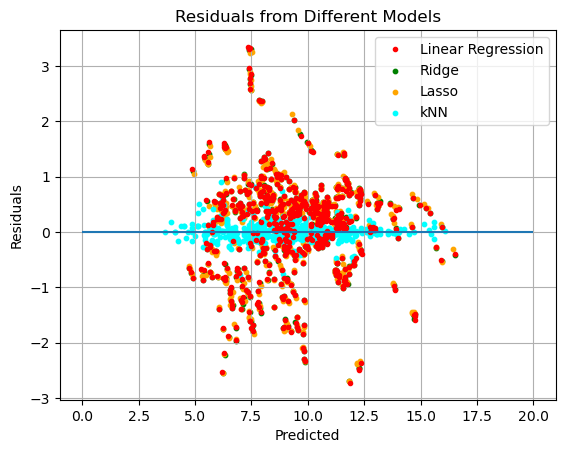

In [58]:
plt.plot(lr_pred,Yr_test-lr_pred, ".", color="red", label="Linear Regression")
plt.scatter(best_ridge_pred,Yr_test-best_ridge_pred, color="green", label="Ridge",s=10)

plt.scatter(best_lasso_pred,Yr_test-best_lasso_pred, color="orange", label="Lasso",s=10)

plt.scatter(best_knnr_pred,Yr_test-best_knnr_pred, color="cyan", label="kNN",s=10)
# plt.scatter(best_svmr_pred_r,Yr_test-best_svmr_pred_r, color="magenta", label="Gaussian SVM",s=10)
# plt.scatter(best_dtr_pred,Yr_test-best_dtr_pred, color="yellow", label="Optimal Tree",s=10)
# plt.scatter(best_rfr_pred,Yr_test-best_rfr_pred, color="brown", label="Random Forest",s=10)
# plt.scatter(best_gbr_pred,Yr_test-best_gbr_pred, color="teal", label="Boosting",s=10)
# plt.scatter(best_nnr_pred,Yr_test-best_nnr_pred, color="pink", label="Neural Network",s=10)

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.title("Residuals from Different Models")
plt.legend(loc="upper right")
plt.grid()

plt.show()


### Question 4

Interpretation and feedback on data analysis: are your results consistent with the exploratory data analysis, for example in terms of the importance of variables?

In [ ]:
# TODO 

### Question 5

In [ ]:
# Importing data with missing values

naData = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

naData['Entity'] = naData['Entity'].astype('category')
naData['Year'] = naData['Year'].astype('category')
naData.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
naData['Density.n.P.Km2.'] = pd.to_numeric(naData['Density.n.P.Km2.'].str.replace(',', '.'))

naData = naData.drop(columns=columns_to_remove)

In [ ]:
naData.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [ ]:
naDataDum=pd.get_dummies(naData[["Year"]], drop_first= True) 

naDataQuant=naData[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
na_dfC=pd.concat([naDataDum,naDataQuant],axis=1)
na_dfC.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,0,0,0,0,0,0,0,0,0,0,...,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,1,0,0,0,0,0,0,0,0,0,...,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,0,1,0,0,0,0,0,0,0,0,...,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,0,0,1,0,0,0,0,0,0,0,...,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,0,0,0,1,0,0,0,0,0,0,...,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


#### Reminder of the amount of missing data ( maybe another title hehe )

In [ ]:
nrows = len(naDataQuant)
missing_rates = 1-naDataQuant.count(axis=0)/nrows
missing_rates

Access to electricity (% of population)                             0.002740
Access to clean fuels for cooking                                   0.046314
Renewable energy share in the total final energy consumption (%)    0.053165
Electricity from nuclear (TWh)                                      0.034530
Electricity from renewables (TWh)                                   0.005755
Low-carbon electricity (% electricity)                              0.011510
Primary energy consumption per capita (kWh/person)                  0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Value_co2_emissions_kt_by_country                                   0.117292
gdp_growth                                                          0.086873
gdp_per_capita                                                      0.077281
Density.n.P.Km2.                                                    0.000274
Land Area(Km2)                                                      0.000274

<Axes: >

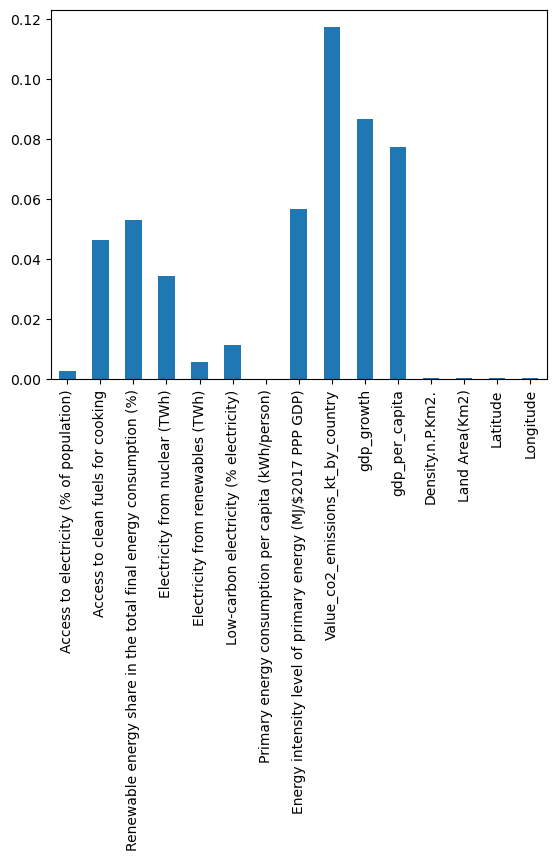

In [ ]:
missing_rates.plot.bar()

Value_co2_emissions_kt_by_country has the highest amount of missing data, this is also the variable we are seaking to predict.

#### Imputation using missForest

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
np.sum(np.sum(np.isinf(naDataQuant)))

0

In [ ]:
naDataQuant.dtypes

Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density.n.P.Km2.                                                    float64
Land Area(Km2)                                                      float64
Latitude    

In [ ]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
data_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=100).fit_transform(naDataQuant)

/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Data after imputation

In [ ]:
data_rfImp=pd.DataFrame(data_rf, columns=naDataQuant.columns)
data_rfImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,7.120463,351.783341,60.0,652230.0,33.93911,67.709953
1,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,4.630912,253.757463,60.0,652230.0,33.93911,67.709953
2,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,6.098914,179.426579,60.0,652230.0,33.93911,67.709953
3,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [ ]:
# data with nan
naDataQuant.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [ ]:
# data with removed nan
dataQuant.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,3.839076,3.082207,36.66,0.0,0.793725,67.021280,5.437941,1.40,8.832278,5.250617,60.0,13.388153,33.93911,67.709953
1,4.479394,3.301515,44.24,0.0,0.748331,62.921350,5.319253,1.20,1.414118,5.353667,60.0,13.388153,33.93911,67.709953
2,5.038938,3.492850,33.88,0.0,0.768115,63.440857,5.529703,1.41,11.229715,5.489067,60.0,13.388153,33.93911,67.709953
3,5.542444,3.721559,31.89,0.0,0.800000,76.190475,5.718411,1.50,5.357403,5.574940,60.0,13.388153,33.93911,67.709953
4,6.004249,3.911521,28.78,0.0,0.866025,78.947370,5.870087,1.53,13.826320,5.885251,60.0,13.388153,33.93911,67.709953


#### Prevision with imputated data

In [ ]:
data_rfImp_pred=data_rfImp[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]

dfCImp=pd.concat([naDataDum,data_rfImp_pred],axis=1)
dfCImp.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,0,0,0,0,0,0,0,0,0,0,...,0.31,65.957440,302.59482,1.64,7.120463,351.783341,60.0,652230.0,33.93911,67.709953
1,1,0,0,0,0,0,0,0,0,0,...,0.50,84.745766,236.89185,1.74,4.630912,253.757463,60.0,652230.0,33.93911,67.709953
2,0,1,0,0,0,0,0,0,0,0,...,0.56,81.159424,210.86215,1.40,6.098914,179.426579,60.0,652230.0,33.93911,67.709953
3,0,0,1,0,0,0,0,0,0,0,...,0.63,67.021280,229.96822,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,0,0,0,1,0,0,0,0,0,0,...,0.56,62.921350,204.23125,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [ ]:
# Transformation des donnees - sqrt / log ??
#Transformation of variables
#WARNING: Only run ONCE!!

epsilon=0.000001
dfCImp['Access to electricity (% of population)'] = np.sqrt(dfCImp['Access to electricity (% of population)']+epsilon)
dfCImp["Access to clean fuels for cooking"] = np.sqrt(dfCImp["Access to clean fuels for cooking"]+epsilon)

dfCImp["Electricity from nuclear (TWh)"] = np.sqrt(dfCImp["Electricity from nuclear (TWh)"]+epsilon)
dfCImp["Electricity from renewables (TWh)"] = np.sqrt(dfCImp["Electricity from renewables (TWh)"]+epsilon)


dfCImp["Primary energy consumption per capita (kWh/person)"] = np.log(dfCImp["Primary energy consumption per capita (kWh/person)"]+epsilon)
dfCImp["gdp_per_capita"] = np.log(dfCImp["gdp_per_capita"]+epsilon)
dfCImp["Land Area(Km2)"] = np.log(dfCImp["Land Area(Km2)"]+epsilon)

In [ ]:
data_rfImp["Value_co2_emissions_kt_by_country"] = np.log(data_rfImp["Value_co2_emissions_kt_by_country"])
Yrna=data_rfImp["Value_co2_emissions_kt_by_country"]

In [ ]:
np.sum(np.sum(np.isnan(dfCImp)))

0

In [ ]:
XnaImp_train,XnaImp_test,Yrna_train,Yrna_test=train_test_split(dfCImp,Yrna,test_size=0.2,random_state=11)


In [ ]:
scaler = StandardScaler()  
scaler.fit(XnaImp_train)  
Xrna_train = scaler.transform(XnaImp_train)  
Xrna_test = scaler.transform(XnaImp_test)

### Random Forest

Best score = 0.006310, Best parameters = {'max_features': 9}


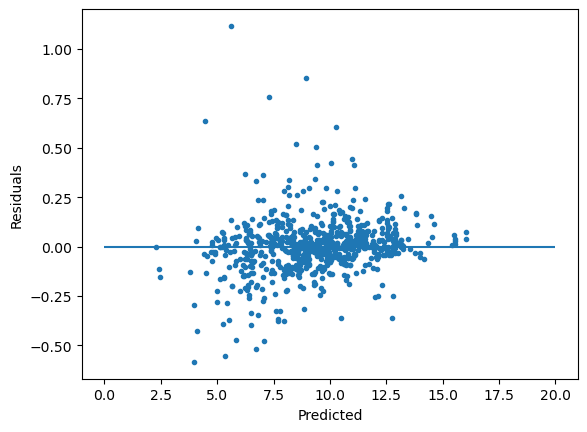

In [ ]:
rfr_params_na =[{"max_features":list(range(2,10,1))}]
rfr_grid_na = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params_na, cv=5)
rfr_grid_opt_na=rfr_grid_na.fit(Xrna_train, Yrna_train)
best_rfr_model_na = rfr_grid_na.best_estimator_
best_rfr_pred_na = rfr_grid_opt_na.predict(Xrna_test)
best_rfr_mse_na = mean_squared_error(Yrna_test, best_rfr_pred_na)
best_rfr_r2_na = r2_score(Yrna_test, best_rfr_pred_na)

print("Best score = %f, Best parameters = %s" % (1.-rfr_grid_opt_na.best_score_,rfr_grid_opt_na.best_params_))

plt.plot(best_rfr_pred_na,Yrna_test-best_rfr_pred_na,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

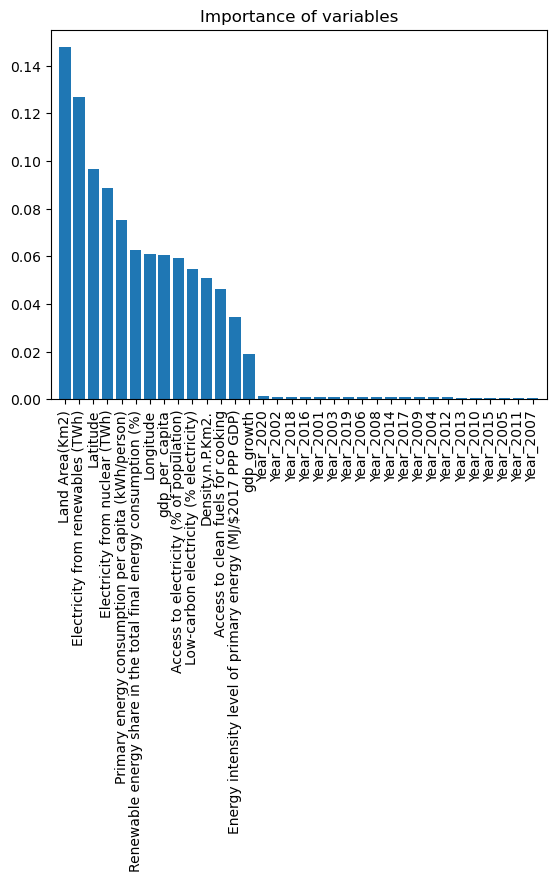

In [ ]:
# using the best method found above
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xrna_train, Yrna_train)

importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xrna_train.shape[1]):
#    print(dfCImp.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xrna_train.shape[1]), importances[indices])
plt.xticks(range(Xrna_train.shape[1]),  dfCImp.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xrna_train.shape[1]])
plt.show()

### KNN

In [ ]:
knnr_params_na=[{"n_neighbors":list(range(1,15))}]
knnr_grid_na = GridSearchCV(KNeighborsRegressor(), knnr_params_na, cv=10, n_jobs=-1)
knnr_grid_opt_na=knnr_grid_na.fit(Xrna_train, Yrna_train)
best_knnr_model_na = knnr_grid_na.best_estimator_
best_knnr_pred_na = knnr_grid_opt_na.predict(Xrna_test)
best_knnr_mse_na = mean_squared_error(Yrna_test, best_knnr_pred_na)
best_knnr_r2_na = r2_score(Yrna_test, best_knnr_pred_na)

print("Best score = %f, Best parameters = %s" % (1.-knnr_grid_opt_na.best_score_,knnr_grid_opt_na.best_params_))

plt.plot(best_knnr_pred_na,Yrna_test-best_knnr_pred_na,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

##### Comparison to prevision with data used originally

In [ ]:
print("Mean Squared Error for the regression models:")
print("Random forest model: ", best_rfr_mse)
print("Random forest model: ", best_rfr_mse_na)

Mean Squared Error for the regression models:
Random forest model:  0.01937448384305289
Random forest model:  0.021055313523408684


In [ ]:
print("R2 for the regression models:")
print("Random forest model: ", best_rfr_r2)
print("Random forest model: ", best_rfr_r2_na)

R2 for the regression models:
Random forest model:  0.9963603224814845
Random forest model:  0.9962958826372228
